In [1]:
%config IPCompleter.greedy=True

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, confusion_matrix
from sklearn.preprocessing import PolynomialFeatures


import plotly.express as px
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn import ensemble
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.metrics import r2_score

In [3]:
data=pd.read_csv('data\data.csv')
data.head()

,Unnamed: 0,Глубина_м,Нагрузка_на_долото_тонн,Скорость_ротора,Плотность_на_входе_кг/м3,Расход_на_входе_литр/сек,Диам_скваж_мм,Код_стратиграфии,№_скважины,Ср_мех_скорость_м/ч
0,0,7.80,0.0,56,1.01,43.2682,324,20,6109,0.0690
1,1,7.90,0.0,56,1.01,42.9248,324,20,6109,4.7368
2,2,8.01,0.0,72,1.01,43.0965,324,20,6109,2.4444
3,3,8.11,0.0,72,1.01,43.0965,324,20,6109,7.3469
4,4,8.20,0.0,72,1.01,42.9248,324,20,6109,7.7143


In [4]:
data.shape

(174830, 10)

In [5]:
le_strat_code = LabelEncoder()

le_strat_code.fit(data['№_скважины'])
LabelEncoder()
list(le_strat_code.classes_)
data['№_скважины']=le_strat_code.transform(data['№_скважины'])

In [6]:
data.head()

,Unnamed: 0,Глубина_м,Нагрузка_на_долото_тонн,Скорость_ротора,Плотность_на_входе_кг/м3,Расход_на_входе_литр/сек,Диам_скваж_мм,Код_стратиграфии,№_скважины,Ср_мех_скорость_м/ч
0,0,7.80,0.0,56,1.01,43.2682,324,20,2,0.0690
1,1,7.90,0.0,56,1.01,42.9248,324,20,2,4.7368
2,2,8.01,0.0,72,1.01,43.0965,324,20,2,2.4444
3,3,8.11,0.0,72,1.01,43.0965,324,20,2,7.3469
4,4,8.20,0.0,72,1.01,42.9248,324,20,2,7.7143


In [7]:
data['Код_стратиграфии'].value_counts()

622    51906
621    16541
34     15868
361    14748
39     14565
61      9118
362     6430
35      6409
32      6294
360     6041
60      5750
31      4928
50      4322
40      3375
38      3180
37      2416
33      2128
20       798
10        13
Name: Код_стратиграфии, dtype: int64

In [8]:
data['Код_стратиграфии'].unique()

array([ 20,  31,  32,  33,  34,  35, 361, 362,  37,  38,  39,  40,  50,
        60,  61, 621, 622,  10, 360], dtype=int64)

<AxesSubplot:>

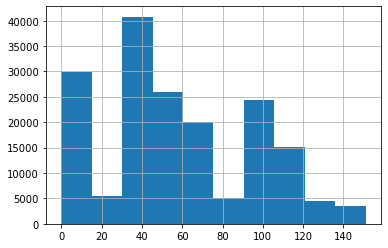

In [9]:
data['Скорость_ротора'].hist()

<AxesSubplot:>

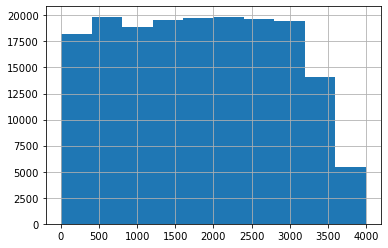

In [10]:
data['Глубина_м'].hist()

<AxesSubplot:>

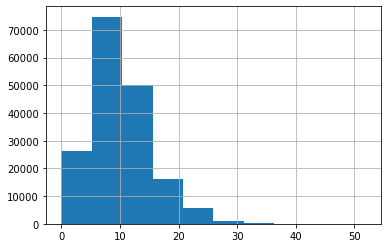

In [11]:
data['Нагрузка_на_долото_тонн'].hist()

<AxesSubplot:>

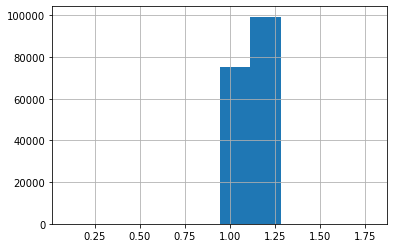

In [12]:
data['Плотность_на_входе_кг/м3'].hist()

<AxesSubplot:>

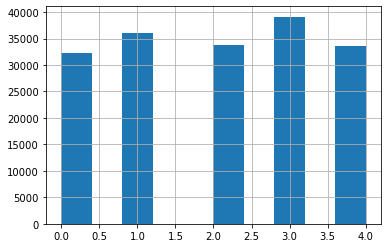

In [13]:
data['№_скважины'].hist()

<AxesSubplot:>

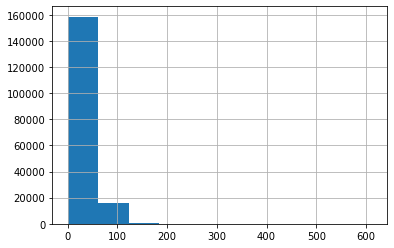

In [14]:
data['Ср_мех_скорость_м/ч'].hist()

In [15]:
len(data)

174830

### Код стратиграфии 34

In [16]:
data=data[data['Код_стратиграфии']==34]

In [17]:
#Сформируем датасет без кода стратиграфии
data=data.drop('Код_стратиграфии', axis=1)

In [18]:
data.head()

,Unnamed: 0,Глубина_м,Нагрузка_на_долото_тонн,Скорость_ротора,Плотность_на_входе_кг/м3,Расход_на_входе_литр/сек,Диам_скваж_мм,№_скважины,Ср_мех_скорость_м/ч
2450,2450,280.01,16.0,27,1.12,49.9645,245,2,66.0000
2451,2451,280.11,11.0,37,1.12,49.9645,245,2,36.0000
2452,2452,280.20,10.0,37,1.12,49.9645,245,2,54.0000
2453,2453,280.30,12.0,37,1.12,49.9645,245,2,45.0000
2454,2454,280.40,10.0,37,1.12,52.1966,245,2,25.7143


In [19]:
y=data['Ср_мех_скорость_м/ч']
#X=data.iloc[:, 1:-1]

In [20]:
y.head()

2450    66.0000
2451    36.0000
2452    54.0000
2453    45.0000
2454    25.7143
Name: Ср_мех_скорость_м/ч, dtype: float64

In [21]:
#X.head()

In [22]:
data['№_скважины'].value_counts()

4    3465
1    3236
2    3229
3    3193
0    2745
Name: №_скважины, dtype: int64

In [23]:
data['Диам_скваж_мм'].value_counts()

245    15711
178      157
Name: Диам_скваж_мм, dtype: int64

<AxesSubplot:>

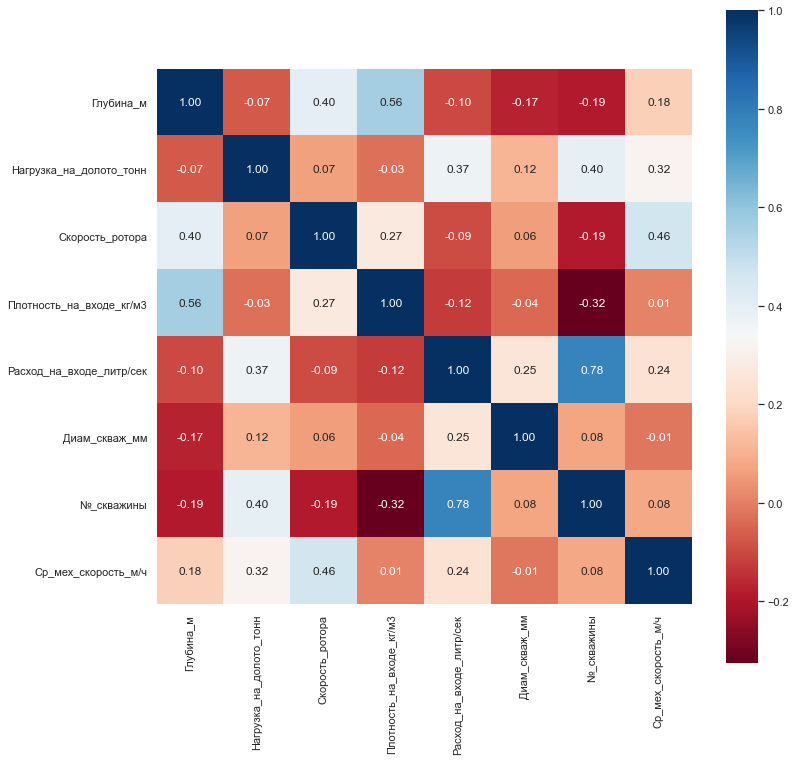

In [24]:
sns.set(font_scale=1)
plt.subplots(figsize=(12, 12))
sns.heatmap(data.iloc[:, 1:].corr(), square=True,
              annot=True, fmt=".2f", linewidths=0., cmap="RdBu")


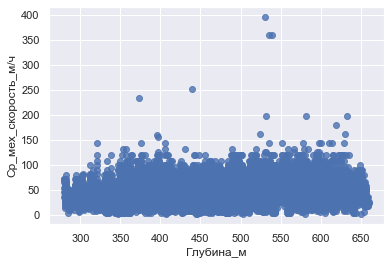

In [25]:
sns.regplot(x='Глубина_м', y='Ср_мех_скорость_м/ч', data=data, fit_reg=False)
plt.show()

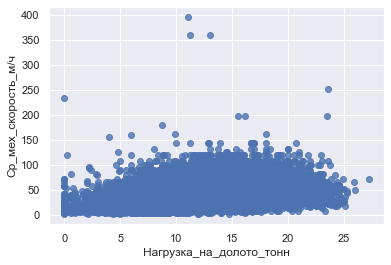

In [26]:
sns.regplot(x='Нагрузка_на_долото_тонн', y='Ср_мех_скорость_м/ч', data=data, fit_reg=False)
plt.show()

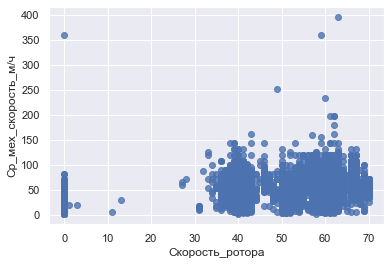

In [27]:
sns.regplot(x='Скорость_ротора', y='Ср_мех_скорость_м/ч', data=data, fit_reg=False)
plt.show()

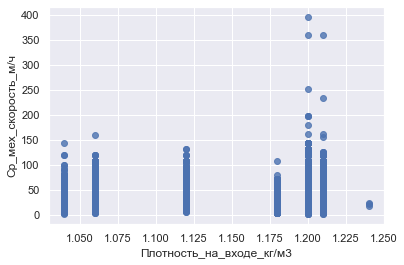

In [28]:
sns.regplot(x='Плотность_на_входе_кг/м3', y='Ср_мех_скорость_м/ч', data=data, fit_reg=False)
plt.show()

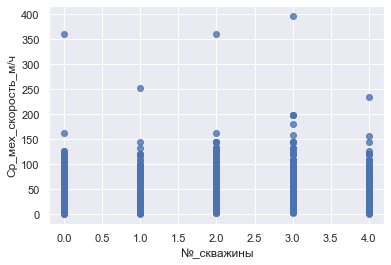

In [29]:
sns.regplot(x='№_скважины', y='Ср_мех_скорость_м/ч', data=data, fit_reg=False)
plt.show()

In [30]:
data=data.drop(['Расход_на_входе_литр/сек','Диам_скваж_мм'], axis = 1)
data.head()

,Unnamed: 0,Глубина_м,Нагрузка_на_долото_тонн,Скорость_ротора,Плотность_на_входе_кг/м3,№_скважины,Ср_мех_скорость_м/ч
2450,2450,280.01,16.0,27,1.12,2,66.0000
2451,2451,280.11,11.0,37,1.12,2,36.0000
2452,2452,280.20,10.0,37,1.12,2,54.0000
2453,2453,280.30,12.0,37,1.12,2,45.0000
2454,2454,280.40,10.0,37,1.12,2,25.7143


In [31]:
X=data.iloc[:, 1:-1]

<AxesSubplot:>

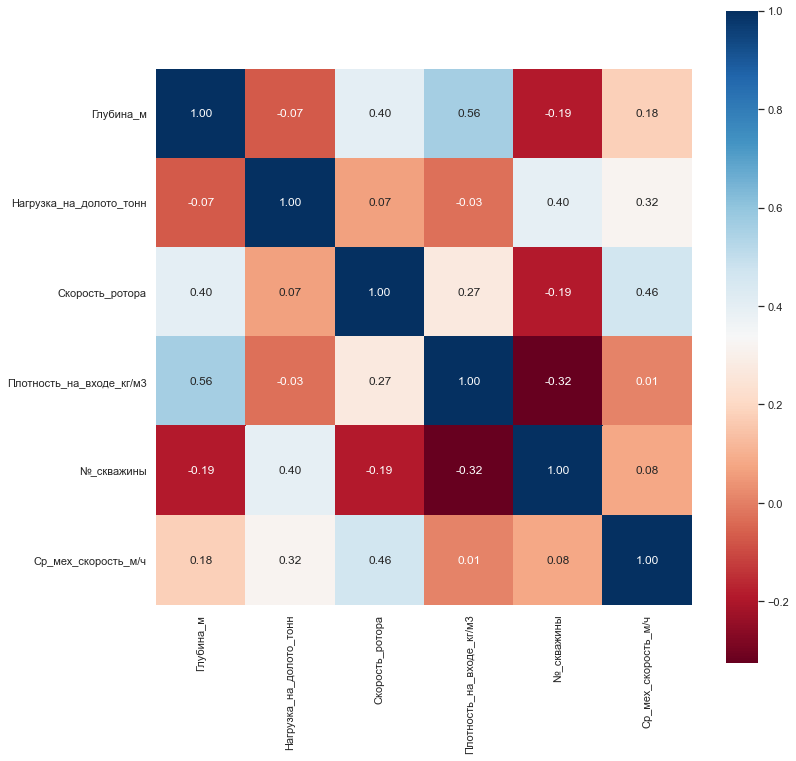

In [32]:
sns.set(font_scale=1)
plt.subplots(figsize=(12, 12))
sns.heatmap(data.iloc[:, 1:].corr(), square=True,
              annot=True, fmt=".2f", linewidths=0., cmap="RdBu")


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
Model1=LinearRegression()
Model1.fit(X_train, y_train)
y_pred=Model1.predict(X_test)
y_pred;

In [34]:
print('MSE=', mean_squared_error(y_pred, y_test))
print('MAE=', mean_absolute_error(y_pred, y_test))
print ('R-squared=', Model1.score(X_train, y_train))

MSE= 442.26223468019657
MAE= 15.566470782617618
R-squared= 0.3259094657531889


##### Полиномы

In [35]:
data_sq=data*data
data_sq.head()

,Unnamed: 0,Глубина_м,Нагрузка_на_долото_тонн,Скорость_ротора,Плотность_на_входе_кг/м3,№_скважины,Ср_мех_скорость_м/ч
2450,6002500,78405.6001,256.0,729,1.2544,4,4356.000000
2451,6007401,78461.6121,121.0,1369,1.2544,4,1296.000000
2452,6012304,78512.0400,100.0,1369,1.2544,4,2916.000000
2453,6017209,78568.0900,144.0,1369,1.2544,4,2025.000000
2454,6022116,78624.1600,100.0,1369,1.2544,4,661.225224


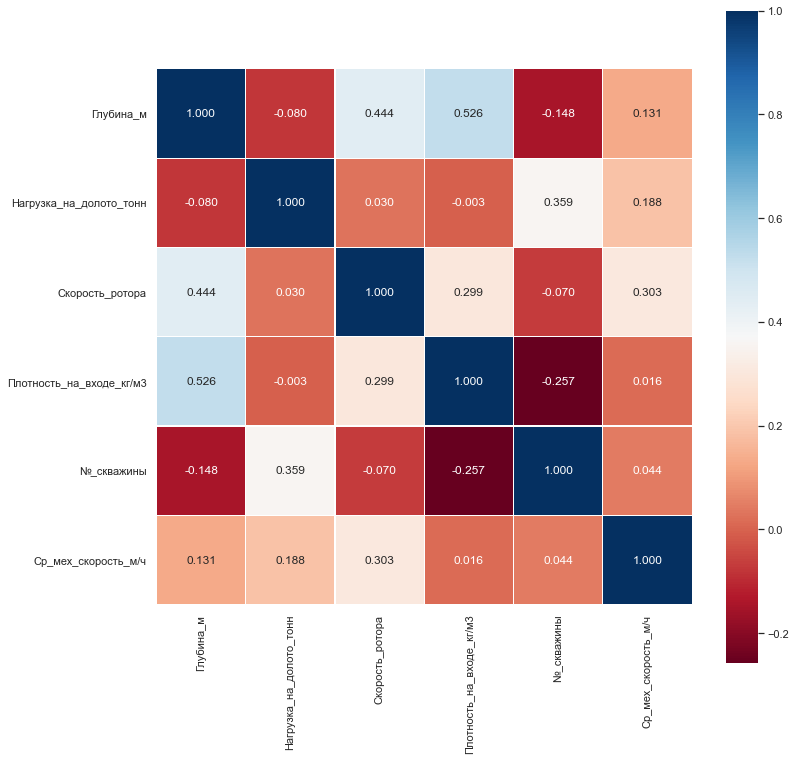

In [36]:
X=data_sq.iloc[:,1:-1]
y=data_sq['Ср_мех_скорость_м/ч']
sns.set(font_scale=1)
plt.subplots(figsize=(12, 12))
sns.heatmap(pd.concat([X, y], axis=1).corr(), square=True,
              annot=True, fmt=".3f", linewidths=0.1, cmap="RdBu");

##### Логарифмы

In [37]:
data_log=np.log(data)
data_log.head()

,Unnamed: 0,Глубина_м,Нагрузка_на_долото_тонн,Скорость_ротора,Плотность_на_входе_кг/м3,№_скважины,Ср_мех_скорость_м/ч
2450,7.803843,5.634825,2.772589,3.295837,0.113329,0.693147,4.189655
2451,7.804251,5.635182,2.397895,3.610918,0.113329,0.693147,3.583519
2452,7.804659,5.635504,2.302585,3.610918,0.113329,0.693147,3.988984
2453,7.805067,5.635860,2.484907,3.610918,0.113329,0.693147,3.806662
2454,7.805475,5.636217,2.302585,3.610918,0.113329,0.693147,3.247047


In [38]:
X=data_log.iloc[:,1:-1]
X.head()

,Глубина_м,Нагрузка_на_долото_тонн,Скорость_ротора,Плотность_на_входе_кг/м3,№_скважины
2450,5.634825,2.772589,3.295837,0.113329,0.693147
2451,5.635182,2.397895,3.610918,0.113329,0.693147
2452,5.635504,2.302585,3.610918,0.113329,0.693147
2453,5.635860,2.484907,3.610918,0.113329,0.693147
2454,5.636217,2.302585,3.610918,0.113329,0.693147


In [39]:
y=data_log['Ср_мех_скорость_м/ч']

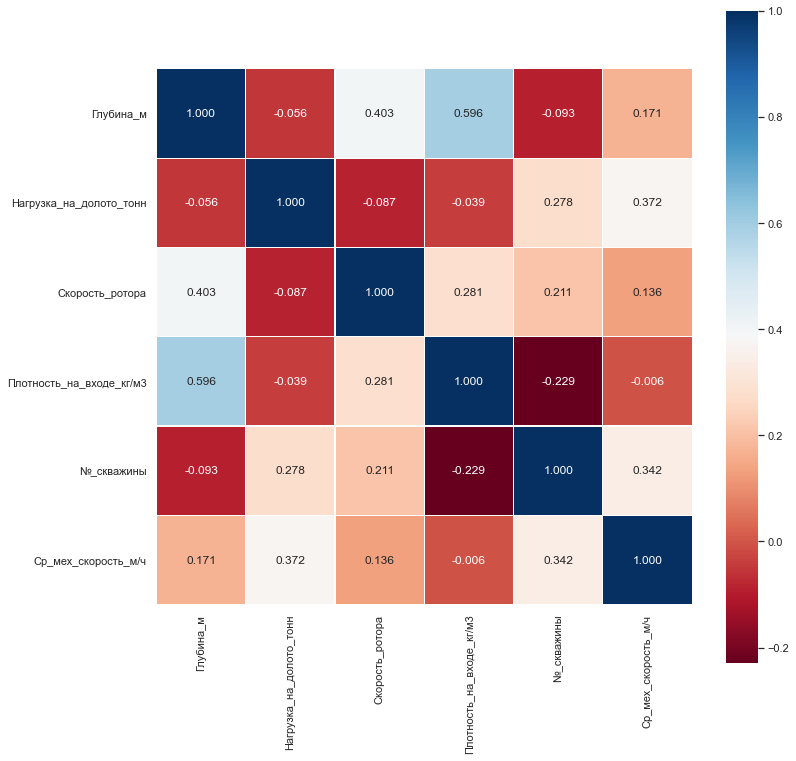

In [40]:
sns.set(font_scale=1)
plt.subplots(figsize=(12, 12))
sns.heatmap(pd.concat([X, y], axis=1).corr(), square=True,
              annot=True, fmt=".3f", linewidths=0.1, cmap="RdBu");